<a href="https://colab.research.google.com/github/emil-meyknecht/Sarsa_Cliff_Problem/blob/main/SarsaCliffProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning 
A computational model of reinforcement learning for a simple Gridworld Problem

```
  ____    ____     ____   ____
  ____    ____     ____   ____

|| s00  |  s01  |  s02 | s03 ||
  ____    ____     ____   ____
    
|| s04  |  s05  |  s06 | s07 ||
  ____    ____     ____   ====
  
|| s08  |  s09  |  s10 | s11 ||
  ____    ____     ====   ____
   
|| s12  |  s13  |  s14 | s15 ||
  ____    ____     ____   ____
  ____    ____     ____   ____
```

 - Agent starts in s0 and can chose from 4 different actions (up, down, left, right).
 
 - Reward is only delivered in final state 15.
 
 - || (horizontal & vertical) indicates non-permeable wall
 - | (horizontal & vertical) indicates permeable wall
 
 <br>
 <br>
 Course: Cognitive Modelling (4032COGNMY)  <br>
 Author: Franz Wurm <f.r.wurm@fsw.leidenuniv.nl> <br>
 Date: Sept. 2021

### Load packages

In a first step we should load important packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)}) #print float values with 1 decimal

### Set parameters

Here we set the framework for our simulation and the agent(s)

In [ ]:
nTrial = 100 #specify how many times you want to run the q-learning function
nAgent = 100

method = 'egreedy' #options: greedy | egreedy | softmax

alpha = 0.1 #learning rate
beta = 1 #inverse temperature
gamma = 1 # discounting factor
epsilon = 0.1 #parameter for ε-greedy action selection

### Initialize variables

Here we define important variables (e.g. the start and goal state of the environment)

In [ ]:
actions = np.array(['up', 'left', 'down', 'right'])

s_0 = 24 #start state
s_cliff = [25,26,27,28, 29, 30]
s_terminal = 31 #final state (goal)

envsizeHorizontal = 4 #size of the environment
envsizeVertical = 8 #size of the environment
iZ = 0
states= np.empty([envsizeHorizontal,envsizeVertical],dtype=float)
for iY in range(envsizeHorizontal):
    for iX in range(envsizeVertical):
        states[iY][iX] = iZ
        iZ +=1
#print('states')
print(states)        

movecounterQ = np.empty([nTrial,nAgent] )
movecounterSarsa = np.empty([nTrial,nAgent] )

[[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0]
 [8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0]
 [16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0]
 [24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0]]


### Helper function

Some computational steps have to be performed multiple times.
Here we define those function so we can call them later on in the script.

In [ ]:
def move1step(instate,action):
    
    coords = list(np.where(states == instate))
    
    if (action == 'up'):
        coords[0] -= 1
    if (action == 'down'):
        coords[0] += 1
    if (action == 'left'):
        coords[1] -= 1
    if (action == 'right'):
        coords[1] += 1
        
    if (coords[0] < 0):
        coords[0] = 0
    if (coords[1] < 0):
        coords[1] = 0 
    if (coords[0] >= envsizeHorizontal):
        coords[0] = envsizeHorizontal-1    
    if (coords[1] >= envsizeVertical):
        coords[1] = envsizeVertical-1
        
    outstate = states[coords[0],coords[1]]   
    return(outstate)  

def getReward(state1,state2):
    if (state2 == s_terminal):
        reward = 10 #final reward at the end of the run
    else:
        reward = 0 #intermediate reward (after each action) 
    if (state1 == state2):
        reward = 0 #reward for running into a wall?
    if (state2 in s_cliff):
       reward = - 10
    return reward

def reset(states):
    if (state2 in s_cliff):
       state1 = s_0
def reset(states):
    states.state (0,0)

#ga terug
    return states
    

#Function to get an action with eGreedy
def eGreedy(actions, qvals):
    if (np.random.random() < epsilon):
        action = np.random.choice(actions, size = 1)

    else:
        choices = np.array(qvals == np.max(qvals))
        action = np.random.choice(actions[choices.flatten()])
    
    return action
    

### Start of simulation

Now that we have defined the agent and the environment, we can start the simulation

In [ ]:
#First loop using a SARSA method 
print('AgentSarsa')
for iA in range(nAgent):
    
    print(iA, end=' ')
    Q = np.zeros([len(actions),envsizeHorizontal,envsizeVertical] )
    # Q matrix (actions,x-coordinate states, y-coordinate states)

    #print('initial Q matrix:\n' + str(Q) + '\n')
    Q0Sarsa = deepcopy(Q)

    for iT in range(nTrial): # loop for the different runs
        #if (iT % 100) == 0:
            #print(iT)
        state = s_0
        moves = 0

        
        coord0 = np.where(states == state)
        qvals = Q[:,coord0[0],coord0[1]]
        
        #Get the first action before the loop
        action = eGreedy(actions, qvals)
        
        while (state != s_terminal): # loop within one run

            #Get the coordinates of the current state
            coord0 = np.where(states == state)

            #Take the action and observe the reward
            next_state = move1step(state,action)
            coord1 = np.where(states == next_state)
            reward = getReward(state,next_state)

            #Get the Q-vals of current state in order to determine next action
            qvals = Q[:,coord1[0],coord1[1]]

            #Get the next action with e-Greedy
            nextaction = eGreedy(actions,qvals)
            
            #Index of the first action
            actionidx = (action==actions)

            #Index of the second action
            nextactionidx = (nextaction==actions)

            #Q-value(Current action) = Q-value(Current action) + (Learning-rate * (Reward +(discount-factor * (Q-Value(Next action) - Q-value(Current action))))
            Q[actionidx,coord0[0],coord0[1]] = Q[actionidx,coord0[0],coord0[1]] + alpha * (reward + gamma * (Q[nextactionidx,coord1[0],coord1[1]]) - Q[actionidx,coord0[0],coord0[1]])

            if ((iT == 0) and (next_state == s_terminal)):
                #print('Q matrix before first successful run:\n' + str(Q) + '\n')
                Q1Sarsa = deepcopy(Q)
        
            # update variables for next cycle
            state = next_state
            action = nextaction
            moves += 1
        
        #end of while loop
        movecounterSarsa[iT,iA] = moves
    #end of trial for loop
    #print('final Q matrix:\n' + str(Q) + '\n')
    Q2Sarsa = deepcopy(Q)
#end of agent for loop
print('\n\nFinal Q(s,a) for agent '+str(iA))
print(Q, "\n\n")




AgentSarsa
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

Final Q(s,a) for agent 99
[[[0.0 0.0 -0.0 0.0 0.0 0.0 0.0 0.0]
  [0.0 0.0 0.0 0.0 0.1 0.1 0.0 0.0]
  [3.0 -0.0 0.0 0.0 4.1 1.8 1.1 2.2]
  [2.0 0.0 0.0 0.0 0.1 0.0 0.0 0.0]]

 [[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
  [0.2 0.2 0.7 0.8 1.7 0.0 0.0 1.3]
  [0.2 -0.0 0.0 0.0 0.0 -0.1 0.0 0.0]
  [-0.0 -0.0 -1.0 -1.0 -1.9 -1.0 -1.0 0.0]]

 [[-0.0 0.3 0.4 -0.0 2.5 1.5 0.2 0.0]
  [0.0 -0.1 0.0 0.0 0.1 0.1 0.0 9.5]
  [-0.0 -1.9 -1.0 -1.9 -2.8 -1.0 -1.8 10.0]
  [0.1 -1.0 0.0 -1.0 -1.9 0.0 0.0 0.0]]

 [[0.1 0.0 0.0 0.4 0.0 0.0 0.0 0.0]
  [3.7 4.2 6.0 7.0 8.0 8.5 9.1 1.7]
  [0.0 0.0 0.1 1.0 0.0 -0.1 0.0 0.7]
  [-4.2 -1.9 0.0 -1.1 -1.0 -1.0 1.9 0.0]]] 




### Plotting performance

In [ ]:
#Q2_0 = np.reshape(np.zeros([6,1]),[3,2])

#Q2 = np.zeros([6,1])
#Q2test = np.zeros([6,1])
#idx = [0, 5, 1, 4, 2, 3]

Qmat0Sarsa = np.mean(Q0Sarsa,axis=0)
Qmat1Sarsa = np.mean(Q1Sarsa,axis=0)
Qmat2Sarsa = np.mean(Q2Sarsa,axis=0)




#for i in range(6):
#    Q2[i] = Qmat1[idx[i]]  
#    Q2test[i] = Qmat2[idx[i]]  
#Q2_test = np.reshape(Q2test,[3,2])
#Q2_1 = np.reshape(Q2,[3,2])

print(Qmat0Sarsa)
print(Qmat1Sarsa)
print(Qmat2Sarsa)


[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]]
[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 -0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 -0.5 -0.2 -0.2 -0.2 0.0 -0.2 0.0]
 [-0.5 -0.2 -0.2 0.0 -0.5 -0.2 0.0 0.0]]
[[0.0 0.1 0.1 0.1 0.6 0.4 0.0 0.0]
 [1.0 1.1 1.7 2.0 2.5 2.2 2.3 3.1]
 [0.8 -0.5 -0.2 -0.2 0.3 0.1 -0.2 3.2]
 [-0.5 -0.7 -0.2 -0.8 -1.2 -0.5 0.2 0.0]]


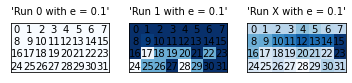

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

layout = [['s0', 's5,6'], ['s1', 's4'], ['s2', 's3']]

min_val, max_val = -1, 10

for i in range(envsizeVertical):
    for j in range(envsizeHorizontal):
        ax1.text(i, j, str(states[j][i].astype(int)), va='center', ha='center',size=10)
        ax2.text(i, j, str(states[j][i].astype(int)), va='center', ha='center',size=10)
        ax3.text(i, j, str(states[j][i].astype(int)), va='center', ha='center',size=10)
ax1.matshow(Qmat0Sarsa, cmap=plt.cm.Blues)  
ax2.matshow(Qmat1Sarsa, cmap=plt.cm.Blues)
ax3.matshow(Qmat2Sarsa, cmap=plt.cm.Blues)

ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax3.axes.xaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)



ax1.title.set_text(f"'Run 0 with e = {epsilon}'")
ax1.title.set_size(10)
ax2.title.set_text(f"'Run 1 with e = {epsilon}'")
ax2.title.set_size(10)
ax3.title.set_text(f"'Run X with e = {epsilon}'")
ax3.title.set_size(10)


### Plotting policy

Following Sutton & Barto (2018), a policy "defines the learning agent's way of behaving at a given time", i.e. the mapping between states and actions.

In [ ]:
index_max = np.argmax(Q2Sarsa,axis=0)
print(index_max)

[[3 2 2 3 2 2 2 1]
 [3 3 3 3 3 3 3 2]
 [0 3 3 3 0 0 0 2]
 [0 0 0 0 0 0 3 0]]


# Questions

How could we make the RL model converge faster to the best course of actions?
- learning rule?
- choice rule?
- environment

# Tips and tricks

1. Print important variables using the `print()` function (e.g., Q)
2. Or even better: plot it!
2. If you dont know a function, try the ? (e.g., `np.array?`)
